In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.stats import shapiro
from scipy import stats

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
from statsmodels.graphics.factorplots import interaction_plot
from pandas.plotting import scatter_matrix

In [10]:
iris=load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
dataframe_iris=pd.DataFrame(iris.data,columns=['sepalLength','sepalWidth','petalLength','petalWidth'])
dataframe_iris.shape

(150, 4)

In [11]:
dataframe_iris1=pd.DataFrame(iris.target,columns=['target'])
dataframe_iris1.shape

(150, 1)

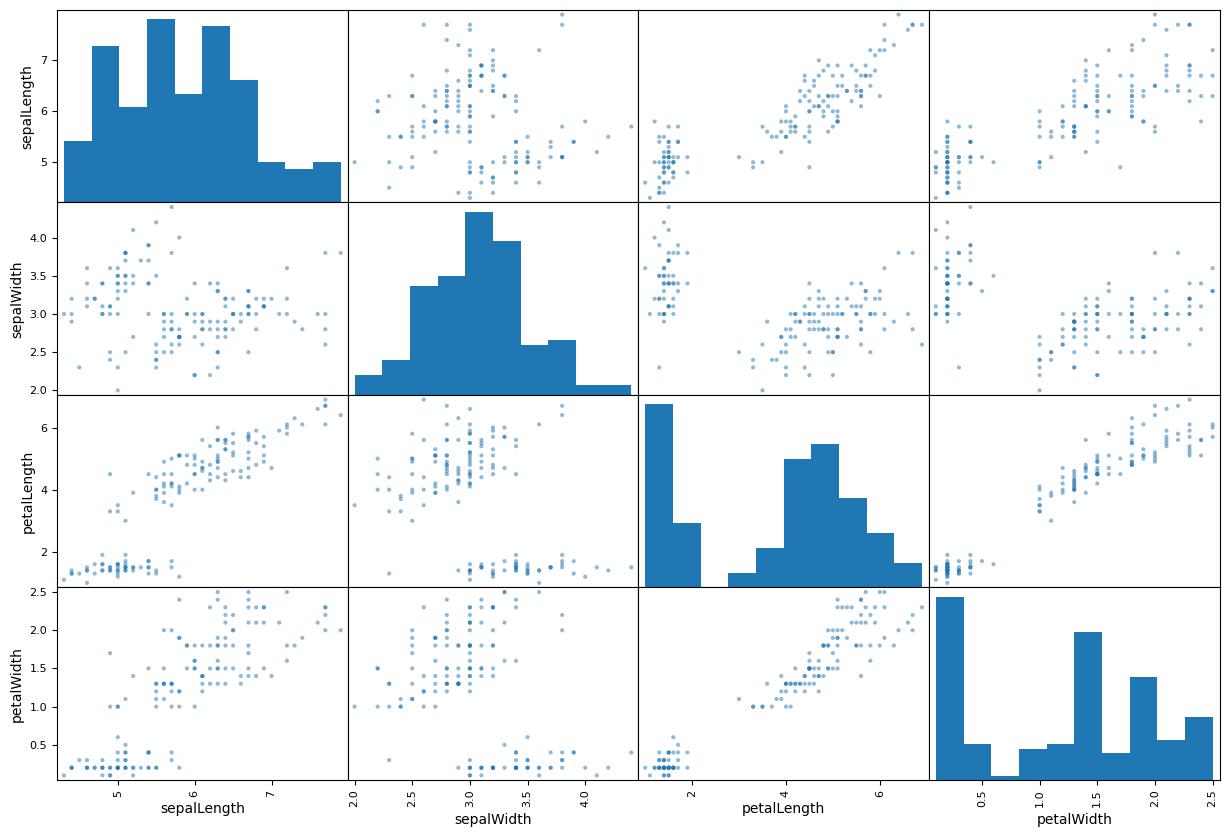

In [12]:
scatter_matrix(dataframe_iris[['sepalLength','sepalWidth','petalLength','petalWidth']],figsize=(15,10)) 
plt.show()

In [13]:
ID=[]
for i in range(0,150):
 ID.append(i)
dataframe=pd.DataFrame(ID,columns=['ID'])
dataframe_iris_new=pd.concat([dataframe_iris,dataframe_iris1,dataframe],axis=1)
dataframe_iris_new.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'target',
       'ID'],
      dtype='object')

C:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x00000222CB094900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


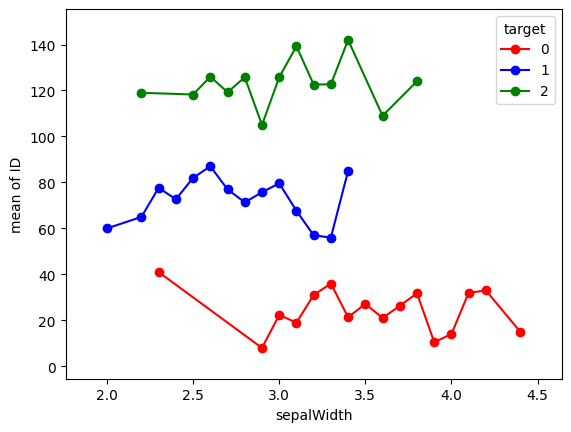

In [14]:
fig = interaction_plot(dataframe_iris_new.sepalWidth,dataframe_iris_new.target,
 dataframe_iris_new.ID,colors=['red','blue','green'], ms=12)

In [15]:
dataframe_iris_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   target       150 non-null    int32  
 5   ID           150 non-null    int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [16]:
dataframe_iris_new.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,target,ID
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,74.500000
std,0.828066,0.435866,1.765298,0.762238,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,37.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,74.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,111.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,149.000000


In [17]:
print(dataframe_iris_new['sepalWidth'].groupby(dataframe_iris_new['target']).mean())

target
0    3.428
1    2.770
2    2.974
Name: sepalWidth, dtype: float64


In [19]:
dataframe_iris_new.mean()

sepalLength     5.843333
sepalWidth      3.057333
petalLength     3.758000
petalWidth      1.199333
target          1.000000
ID             74.500000
dtype: float64

In [20]:
stats.shapiro(dataframe_iris_new['sepalWidth'][dataframe_iris_new['target']])

ShapiroResult(statistic=0.7824642658233643, pvalue=1.1905897817111877e-13)

In [21]:
p_value=stats.levene(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])
p_value

LeveneResult(statistic=55.1738582824089, pvalue=1.1695737027923672e-12)

In [22]:
F_value,P_value=stats.f_oneway(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])
print("F_value=",F_value,",","P_value=",P_value)

F_value= 737.2872570149498 , P_value= 1.4182422887114198e-82


In [23]:
if F_value>1.0:
 print("******SAMPLES HAVE DIFFERENT MEAN******")
else:
 print("******SAMPLES HAVE EQUAL MEAN******")

******SAMPLES HAVE DIFFERENT MEAN******


In [24]:
if P_value<0.05:
 print("******REJECT NULL HYPOTHESIS******")
else:
 print("******ACCEPT NULL HYPOTHESIS******")

******REJECT NULL HYPOTHESIS******


In [28]:
tukey = pairwise_tukeyhsd(endog=dataframe_iris_new['sepalWidth'], 
groups=dataframe_iris_new['target'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------
